# Blockbusting in the 21st Century?: Minority Move-ins and Neighborhood Home Value Appreciation

## Introduction


I am using the [**Fannie Mae (FNMA) \& Freddie Mac (FHLMC)**](https://web.archive.org/web/20240914151448/https://www.fhfa.gov/data/single-family-census-tract-file) data to analyze the demographics of move-ins on a census-tract level. This, with the census-level demographic data [**(ACS)**](https://www.nhgis.org/), can provide an estimate of a quantity of minority "move-ins". I am seeing the extent to which this has an effect on the appreciation in home values [(**Zillow ZHVI**)](https://www.zillow.com/research/data/)

My **y-variable** is census-tract property value appreciation. My main **explanatory variables** are minority move-ins and previous neighborhood demographics. I will be controlling for income.

## Data Loading

We start by loading libraries. For dataframes we are using `pandas`, for plots we are using `pyplot` from `matplotlib`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Because the data is in ``.txt`` format, with no column headers, and is in many different files for different years and loan types, some light data cleaning is required. To begin, we set up short titles for each column based on the data dictionary provided, and create a list of columns we do not need.

In [2]:
cols = [
    "enterprise_flag",
    "record_number",
    "state_fips",
    "msa_code",
    "county_fips",
    "census_tract",
    "tract_pct_minority",
    "tract_median_income",
    "local_median_income",
    "tract_income_ratio",
    "borrower_income",
    "area_median_income",
    "borrower_income_ratio",
    "upb_acquisition",
    "purpose",
    "fed_guarantee",
    "num_borrowers",
    "first_time_homebuyer",
    "borrower_race",
    "borrower_ethnicity",
    "coborrower_race",
    "coborrower_ethnicity",
    "borrower_gender",
    "coborrower_gender",
    "borrwer_age",
    "coborrower_age",
    "occupancy_code",
    "rate_spread",
    "hoepa_status",
    "property_type",
    "lien_status",
    "borrower_over_62",
    "co_borrower_over_62",
    "ltv",
    "date_of_note",
    "term_at_org",
    "num_of_units",
    "interest_rate_at_org",
    "note_amount",
    "preapproval",
    "application_channel",
    "aus_name",
    "borrower_credit_score_model",
    "coborrower_credit_score_model",
    "dti_ratio",
    "discount_pts",
    "intro_period",
    "land_prop_interest",
    "property_value",
    "rural_tract",
    "lower_ms_delta",
    "middle_appalachia",
    "persistent_poverty",
    "concentrated_poverty",
    "high_opportunity",
    "qoz_tract",
]
dropcols = [
    "enterprise_flag",
    "record_number",
    "borrower_income",
    "upb_acquisition",
    "purpose",
    "fed_guarantee",
    "rate_spread",
    "hoepa_status",
    "property_type",
    "lien_status",
    "borrower_over_62",
    "co_borrower_over_62",
    "ltv",
    "term_at_org",
    "num_of_units",
    "interest_rate_at_org",
    "preapproval",
    "application_channel",
    "aus_name",
    "borrower_credit_score_model",
    "coborrower_credit_score_model",
    "discount_pts",
    "intro_period",
    "land_prop_interest",
    "rural_tract",
    "lower_ms_delta",
    "middle_appalachia",
    "persistent_poverty",
    "concentrated_poverty",
    "high_opportunity",
    "qoz_tract",
]
cols_pre2018 = [
    "enterprise_flag",
    "record_number",
    "state_fips",
    "msa_code",
    "county_fips",
    "census_tract",
    "tract_pct_minority",
    "tract_median_income",
    "local_median_income",
    "tract_income_ratio",
    "borrower_income",
    "area_median_income",
    "borrower_income_ratio",
    "upb_acquisition",
    "purpose",
    "fed_guarantee",
    "num_borrowers",
    "first_time_homebuyer",
    "borrower_race",
    "borrower_ethnicity",
    "coborrower_race",
    "coborrower_ethnicity",
    "borrower_gender",
    "coborrower_gender",
    "borrwer_age",
    "coborrower_age",
    "occupancy_code",
    "rate_spread",
    "hoepa_status",
    "property_type",
    "lien_status",
]
dropcols_pre2018 = [
    "enterprise_flag",
    "record_number",
    "borrower_income",
    "upb_acquisition",
    "purpose",
    "fed_guarantee",
    "rate_spread",
    "hoepa_status",
    "property_type",
    "lien_status",
]

Next, we load in the census data to give us information about neighborhood demographics

In [9]:
cols_tract = ['YEAR', 'TRACTA','U7J001', 'U7J002', 'U7J003', 'U7J004', 'U7J005', 'U7J006', 'U7J007', 'U7J008']
tract_data = pd.read_csv('data/census/nhgis0009_ds258_2020_tract.csv')[cols_tract]
tract_data.rename(columns={
    'YEAR': 'year', 
    'TRACTA': 'census_tract', 
    'U7J001': 'total_pop', 
    'U7J002': 'white', 
    'U7J003': 'black', 
    'U7J004': 'native_american', 
    'U7J005': 'asian', 
    'U7J006': 'pacific_islander', 
    'U7J007': 'other_race', 
    'U7J008': 'two_or_more'}, inplace=True)

Next, we load in the Zillow data for information about home prices

In [3]:
zhvi = pd.read_csv('data/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv')

The Zillow data is based on zip-code, but all our other data is based on census tract. As a result, we use a Crosswalk File from HUD.

In [10]:
crosswalk = pd.read_excel('data/census/ZIP_TRACT_122024.xlsx')

In [ ]:
# loans groupby census tract merge into crosswalk
# crosswalk find high and low minority move-ins, etc?
# merge with zhvi

## Summary Statistics

One potentially interesting summary statistic is the quantity of loans in 2023 in each metropolitan area. We use ``groupby`` to look at each individual MSA and the count of entries in the table for each to define ``vol_by_msa`` which is the loan volume in each MSA.

In [22]:
loans[['tract_median_income', 'borrower_income', 'property_appraisal_value']].describe()

,tract_median_income,borrower_income,property_appraisal_value
count,2.879458e+07,2.879458e+07,2.879458e+07
mean,9.504369e+04,1.485997e+05,4.968570e+05
std,4.900241e+04,5.525392e+06,8.679106e+06
min,2.499000e+03,0.000000e+00,5.000000e+03
25%,6.794800e+04,6.700000e+04,2.450000e+05
50%,8.800000e+04,1.000000e+05,3.650000e+05
75%,1.134200e+05,1.480000e+05,5.250000e+05
max,9.999990e+05,9.540000e+09,1.000000e+09


## Plots \& Figures

<Axes: ylabel='Frequency'>

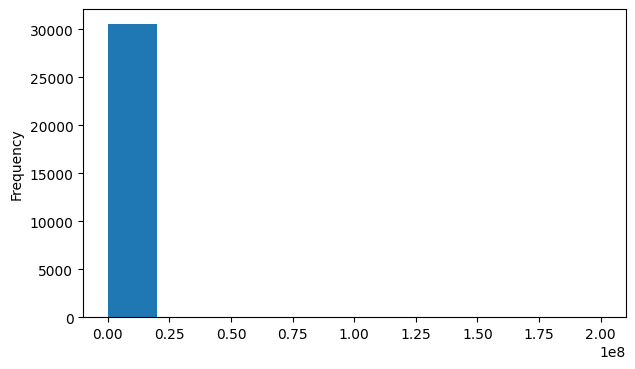

In [16]:
loans.groupby('census_tract_2020')["borrower_income"].mean().sort_values(ascending=False).plot(kind='hist', figsize=(7, 4))

In [17]:
# vol_by_msa.head(10).plot(kind='bar', figsize=(7, 4))
# plt.title('Top 10 MSAs by 2023 Multifamily Loan Count')
# plt.xlabel('MSA Code')
# plt.ylabel('Loan Count')
# plt.show()

In [18]:
# msa_filtered = mf_loans_2023[mf_loans_2023['msa_name'].isin(["'Omaha-Council Bluffs, NE-IA MSA'", "'Kansas City, MO-KS MSA'"])]
# msa_filtered.groupby('msa_name')["prop_val"].mean().sort_values(ascending=False).plot(kind='bar', figsize=(7, 4))
# plt.title('Average Multifamily Property Value for Selected MSAs, 2023')
# plt.xlabel('MSA Name')
# plt.ylabel('Average Property Value')
# plt.show()

In [19]:
# msas_2023_values = sf_loans_2023.groupby('Metropolitan Statistical Area (MSA) Code')["Property Valuation Amount"].mean().sort_values(ascending=False)
# msas_2018_values = sf_loans_2018.groupby('Metropolitan Statistical Area (MSA) Code')["Property Valuation Amount"].mean().sort_values(ascending=False)
# msa_values_by_year = pd.concat([msas_2023_values, msas_2018_values], axis=1)
# msa_values_by_year.columns = ['2023', '2018']
# plt.scatter(msa_values_by_year['2023'], msa_values_by_year['2018'])
# plt.xlabel('2023 Property Valuation Amount')
# plt.ylabel('2018 Property Valuation Amount')
# plt.title('Property Valuation Amount Comparison: 2023 vs 2018')
# plt.show()

In [20]:
# msa_value_change = msa_values_by_year['2023'] - msa_values_by_year['2018']
# msa_value_change.sort_values(ascending=False).plot(kind='hist', figsize=(7, 4))
# plt.title('Change in Property Valuation Amount by MSA: 2023 vs 2018')
# plt.xlabel('Change in Property Valuation Amount')
# plt.ylabel('Count')

## Conclusion

# References
Steven Manson, Jonathan Schroeder, David Van Riper, Katherine Knowles, Tracy Kugler, Finn Roberts, and Steven Ruggles. IPUMS National Historical Geographic Information System: Version 19.0 [dataset]. Minneapolis, MN: IPUMS. 2024. http://doi.org/10.18128/D050.V19.0